### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : plot(kind='bar')
* 히스토그램 : plot(kind='hist')
* 산점도 : plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : plot(kind='box'), 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.

In [4]:
df['NDate'] = pd.to_datetime(df.Date)
df.head()

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [5]:
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

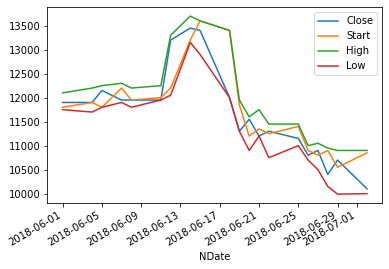

In [6]:
# 선그래프 : plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 
# 선 그래프를 그림
df1.plot()

In [7]:
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

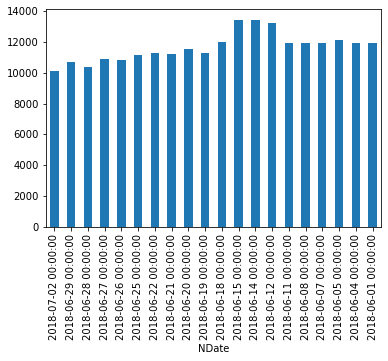

In [8]:
df1.Close.plot(kind='bar')

Q. NDate를 칼럼으로 전환하고 to_period(freq='D') 함수를 이용 일자를 기준으로 새로운 칼럼 Date를 생성하세요.

In [9]:
df1.reset_index(inplace=True)
df1.head()

,NDate,Close,Start,High,Low
0,2018-07-02,10100,10850,10900,10000
1,2018-06-29,10700,10550,10900,9990
2,2018-06-28,10400,10900,10950,10150
3,2018-06-27,10900,10800,11050,10500
4,2018-06-26,10800,10900,11000,10700


In [10]:
df1['Date'] = df1.NDate.dt.to_period(freq='D')
df1.head()

,NDate,Close,Start,High,Low,Date
0,2018-07-02,10100,10850,10900,10000,2018-07-02
1,2018-06-29,10700,10550,10900,9990,2018-06-29
2,2018-06-28,10400,10900,10950,10150,2018-06-28
3,2018-06-27,10900,10800,11050,10500,2018-06-27
4,2018-06-26,10800,10900,11000,10700,2018-06-26


Q. Date를 인덱스로 셋팅하고 Close 칼럼으로 일별 막대 그래프를 표현하세요

In [11]:
df1.set_index('Date',inplace=True)
df1.head()

,NDate,Close,Start,High,Low
Date,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000
2018-06-29,2018-06-29,10700,10550,10900,9990
2018-06-28,2018-06-28,10400,10900,10950,10150
2018-06-27,2018-06-27,10900,10800,11050,10500
2018-06-26,2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

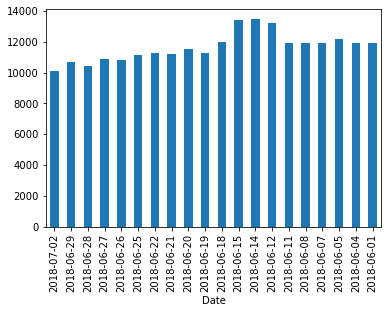

In [12]:
df1.Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

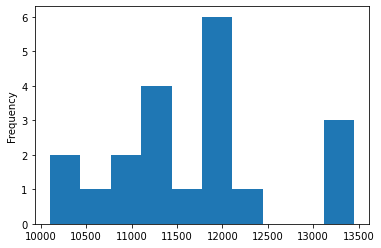

In [13]:
df1.Close.plot(kind='hist')

In [17]:
df['NDate'] = pd.to_datetime(df.Date)
df.head()

,Date,Close,Start,High,Low,Volume,NDate
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요

<AxesSubplot:ylabel='Frequency'>

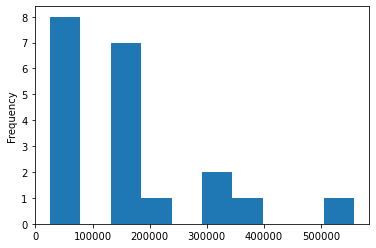

In [18]:
df.Volume.plot(kind='hist')

Q. Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.

<AxesSubplot:xlabel='Close', ylabel='Volume'>

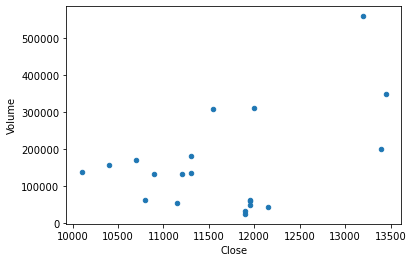

In [19]:
df.plot(x='Close',y='Volume',kind='scatter')

Q. Close 칼럼과 Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot을 표현하세요.

<AxesSubplot:>

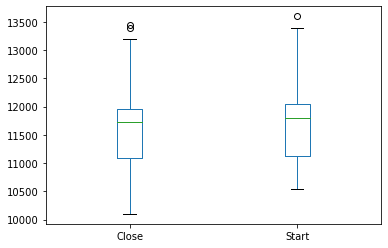

In [20]:
df[['Close','Start']].plot(kind='box')

In [23]:
df_ep = pd.read_excel('dataset/df_ep.xlsx',engine='openpyxl')
df_ep.head(2)

,year,south,north
0,1990,1077,277
1,1991,1186,263


Q. df_ep 데이터프레임으로 다음을 수행하세요.
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

In [22]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


[과제]  
Q. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)

In [27]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
data[:10]
df = pd.DataFrame(data,columns=['Num'])
print(df.head())
df.describe()

          Num
0  305.045068
1  667.971893
2  754.895618
3  514.750498
4  725.052190


,Num
count,10000.000000
mean,494.057027
std,289.458865
min,0.092090
25%,243.525175
50%,490.153922
75%,745.409222
max,999.929355


<AxesSubplot:ylabel='Frequency'>

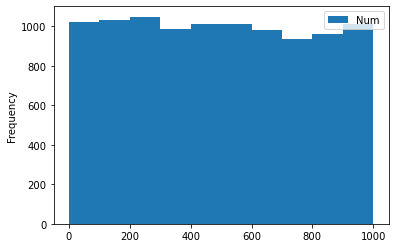

In [28]:
df.plot(kind='hist')

In [29]:
# 평균 0, 표준편차 1인 표준정규분포 난수
data = np.random.randn(10000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
df.describe()

        Num
0 -1.464235
1  0.891305
2 -1.192018
3  1.084761
4  1.230942


,Num
count,10000.000000
mean,-0.010138
std,0.994023
min,-3.997166
25%,-0.690237
50%,-0.011245
75%,0.661986
max,3.579835


In [41]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000)
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
df1.describe()

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815


,Num
count,10000.000000
mean,10.019545
std,1.997672
min,2.687120
25%,8.674150
50%,10.016908
75%,11.343618
max,18.053698


<AxesSubplot:ylabel='Frequency'>

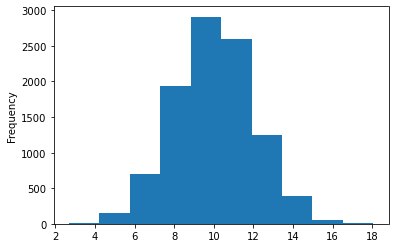

In [42]:
df1.Num.plot(kind='hist')

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- barh plot ; df.plot(kind='barh')
- scatter plot : plt.scatter(x, y)
- box plot : df.boxplot(column=['feature'])

In [4]:
import matplotlib.pyplot as plt

In [44]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

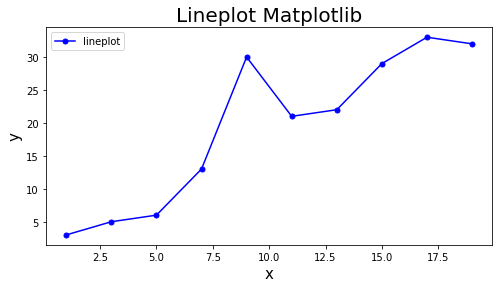

In [48]:
plt.figure(figsize=(8,4))
plt.plot(x,y,color='blue',marker='o',markersize=5)
plt.title('Lineplot Matplotlib',size=20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

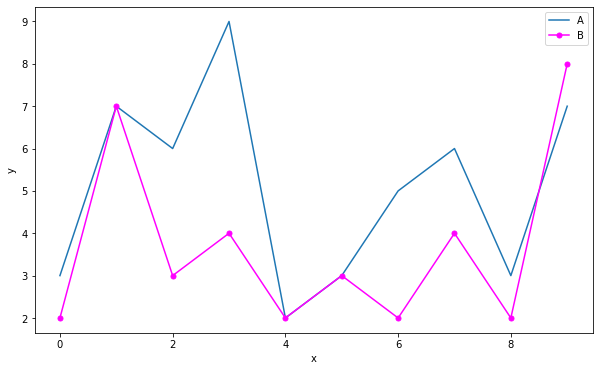

In [56]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta', marker='o', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['A','B'])

Text(0, 0.5, 'y')

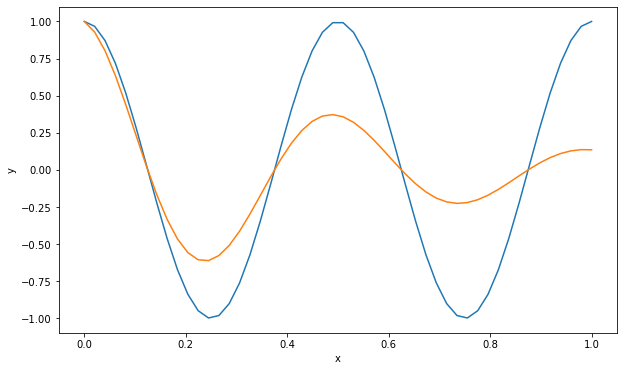

In [57]:
x = np.linspace(0,1,50)
y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)
plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('y')

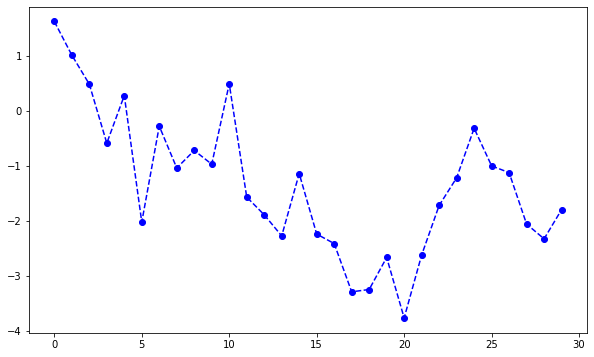

In [61]:
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed',color='b', marker='o')

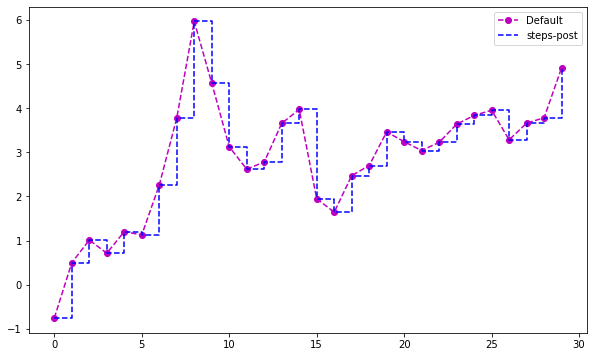

In [65]:
data = np.random.randn(30).cumsum()
plt.figure(figsize=(10,6))
plt.plot(data, 'm--', marker='o', label = 'Default')
plt.plot(data, 'b--', drawstyle='steps-post', label = 'steps-post')
plt.legend(loc='best')

Text(0.5, 0, 'x')

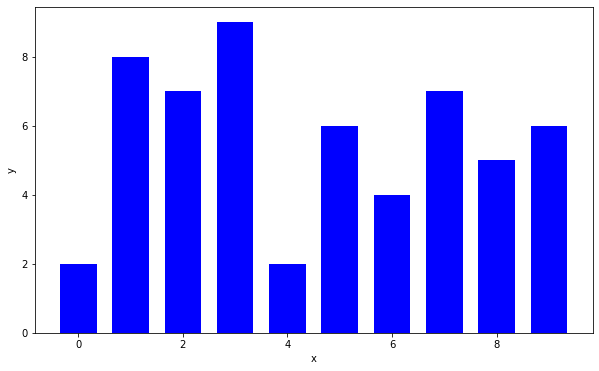

In [66]:
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.7,color='blue')
plt.ylabel('y')
plt.xlabel('x')

In [72]:
# 각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6,4),
                index = ['one','two','three','four','five','six'],
                columns = ['A','B','C','D'])
print(df)

              A         B         C         D
one    0.641566  0.390008  0.485991  0.604310
two    0.549548  0.926181  0.918733  0.394876
three  0.963263  0.173956  0.126330  0.135079
four   0.505662  0.021525  0.947970  0.827115
five   0.015019  0.176196  0.332064  0.130997
six    0.809491  0.344737  0.940107  0.582014


<AxesSubplot:>

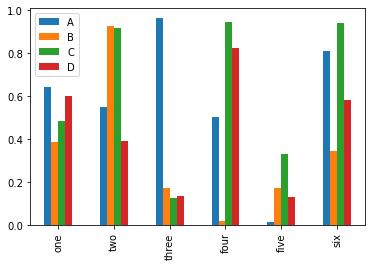

In [73]:
df.plot.bar()

<AxesSubplot:>

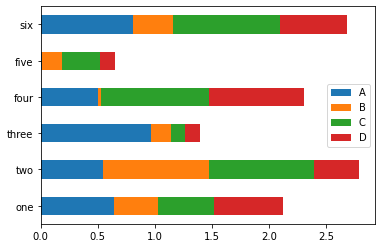

In [75]:
df.plot.barh(stacked=True, alpha=1)

a    0.184010
b    0.787929
c    0.612031
d    0.053909
e    0.420194
f    0.679069
g    0.918602
h    0.000402
i    0.976759
j    0.376580
k    0.973784
l    0.604716
m    0.828846
n    0.574712
o    0.628076
p    0.285576
dtype: float64


<AxesSubplot:>

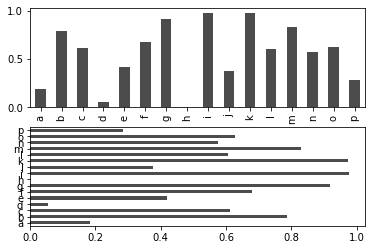

In [78]:
# bar(수직막대), barh(수평막대) 그래프

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
print(data)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

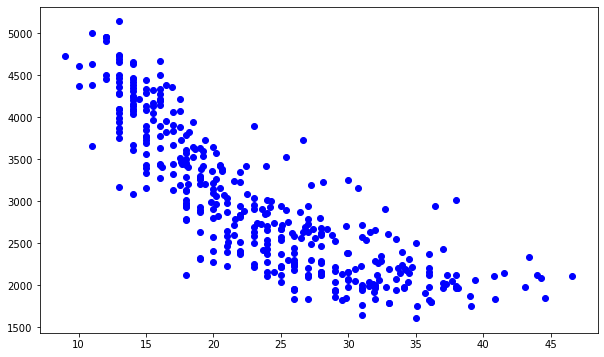

In [79]:
# scatter plot
df_auto = pd.read_excel('dataset/auto-mpg.xlsx',engine='openpyxl')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue')

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

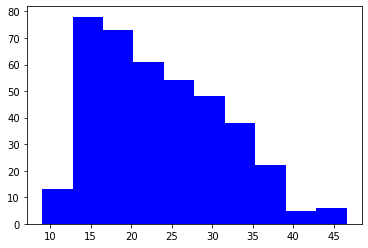

In [80]:
# histogram
plt.hist(x,bins=10,color='blue')

In [82]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [85]:
df_auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<AxesSubplot:>

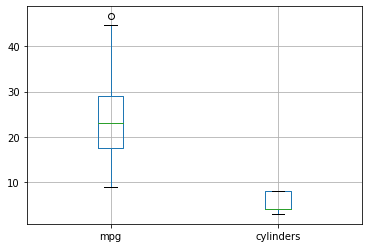

In [88]:
# box plot
df_auto.boxplot(column=['mpg','cylinders'])
# df_auto.boxplot(column=['cylinders'])

In [91]:
df_auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

#### Box plot 의미 해석
* 중앙값
* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [94]:
u_whisker_check = 29 + 11.5*1.5
print(u_whisker_check)
# mpg 내림차순 정렬
mpg = df_auto.mpg.sort_values(ascending=False)
mpg[:5]
print('upper whisker : 44.6')
print('이상치 : {}'.format(df_auto.mpg[df_auto.mpg>44.6]))

46.25
upper whisker : 44.6
이상치 : 322    46.6
Name: mpg, dtype: float64


In [3]:
import pandas as pd

fish_multi = pd.read_csv("dataset/4_fm2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<AxesSubplot:xlabel='species', ylabel='length'>

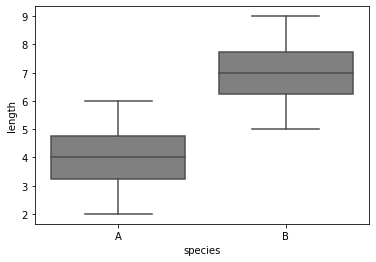

In [4]:
# boxplot
import seaborn as sns
sns.boxplot(x='species', y='length', data=fish_multi, color='gray' )

In [5]:
# 이상치 삽입
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,10
6,A,4
7,A,5
8,A,5
9,A,6


<AxesSubplot:xlabel='species', ylabel='length'>

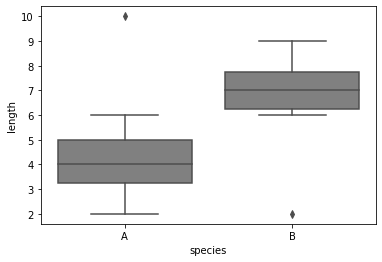

In [6]:
sns.boxplot(x='species', y='length', data=fish_multi, color='gray' )

Q. fish_multi 데이터프레임으로 다음을 수행하세요.

- A, B 두개의 그룹의 Box Plot에서 이상치를 구하세요.

In [14]:
# species A, B의 통계요약표(불린 인덱싱 or query)
fm1 = fish_multi[fish_multi.species=='A']['length']
fm2 = fish_multi[fish_multi.species=='B']['length']
# fm1 = fish_multi.query('species =="A"')['length']
fm1.describe()
print()
fm2.describe()

count    10.000000
mean      6.700000
std       1.888562
min       2.000000
25%       6.250000
50%       7.000000
75%       7.750000
max       9.000000
Name: length, dtype: float64

In [16]:
# A, B 그룹의 이상치
import numpy as np
iqr = 5 - 3.25
uw_check = 5 + 1.5*iqr
print(uw_check)
st1 = np.sort(fm1)[::-1]
print('A그룹 이상치: {}'.format(st1[st1>uw_check]))
print()
iqr = 7.75 - 6.25
lw_check = 6.25 - 1.5*iqr
print(lw_check)
st2 = np.sort(fm2)
print('B그룹 이상치: {}'.format(st2[st2<lw_check]))

7.625
A그룹 이상치: [10]

4.0
B그룹 이상치: [2]


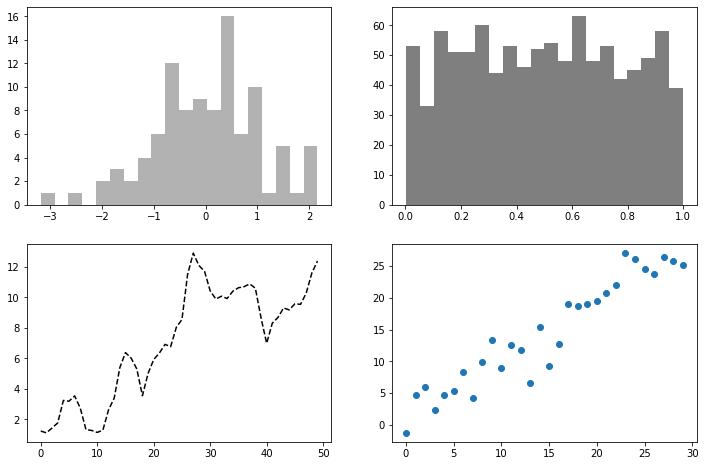

In [97]:
fig = plt.figure(figsize=(12,8))
# figure가 2 x 2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

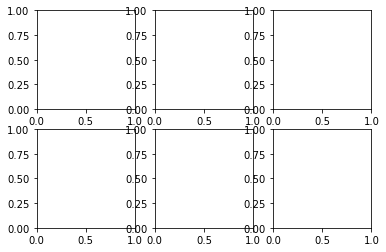

In [99]:
# 특정한 배치에 맞추어 여러 개의 서브플롯을 포함하는 figure 생성
fig, axes = plt.subplots(2,3)
axes

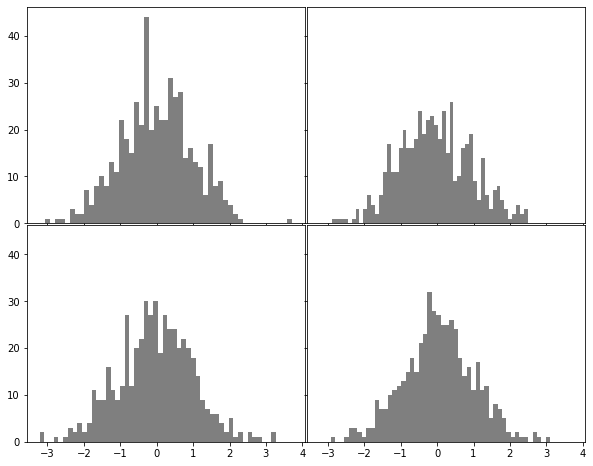

In [7]:
fig, axes = plt.subplots(2,2, figsize=(10,8), sharex=True, sharey=True)
# fig, axes = plt.subplots(2,2, figsize=(10,8))
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01,hspace=0.01)

In [108]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


[과제]  
Q. 시각화 탐색을 통하여 df의 각 칼럼에 대한 인사이트를 기술하세요(5가지 이상)

In [ ]:
# 인사이트 탐색시 주요 Points
# - 의미없는 변수
# - 종속변수인 survived와 상관관계가 높은 변수
# - 분석에 의미있는 파생변수 생성

In [8]:
data = np.random.randn(1000)
cdata = data.cumsum()
cdata[:10]

array([0.60063194, 1.49197587, 2.11140717, 1.13547616, 1.27220867,
       2.01892042, 1.96617695, 0.12574081, 0.9234328 , 0.62259708])

Text(0.5, 0, 'Stages')

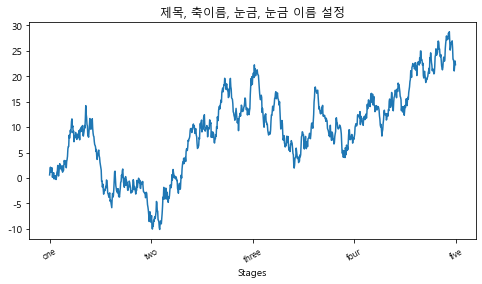

In [13]:
import warnings
warnings.filterwarnings('ignore')
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')

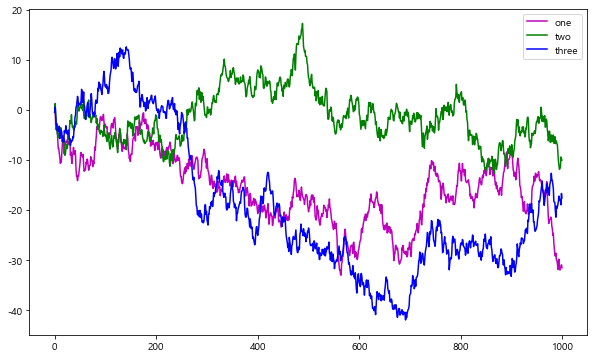

In [17]:
from numpy.random import randn
fig = plt.figure(figsize=(10,6)); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm', label='one')
ax.plot(randn(1000).cumsum(), 'g', label='two')
ax.plot(randn(1000).cumsum(), 'b', label='three')
plt.legend(loc="best")